# EXPREIMENT 3 -  Visualization of evaluation parameters module

## Evaluation of model performance and visualization of results

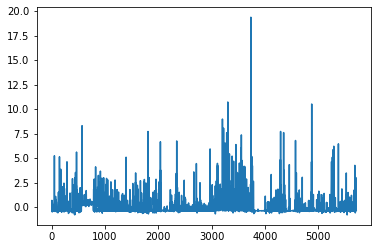

In [20]:
preds = model.predict(TrainX)
TestY
x_pts = np.arange(0,TrainX.shape[0],1)
plt.plot(x_pts,preds)

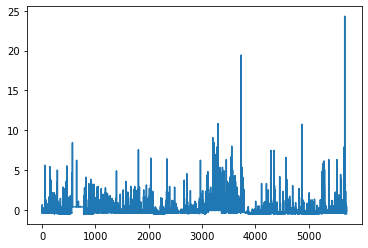

In [21]:
plt.plot(x_pts,TrainY)

In [22]:
TestX.shape

(1904, 80)

##### Plot of predicted values (before scaling back)

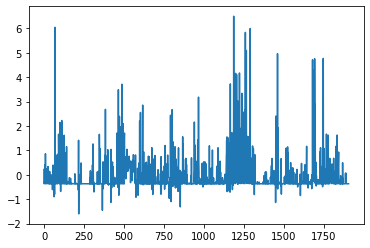

In [23]:
TEST_preds = model.predict(TestX)
x_pts = np.arange(0,TestY.shape[0] ,1)
plt.plot(x_pts,TEST_preds)

##### Plot of true values (before scaling back)

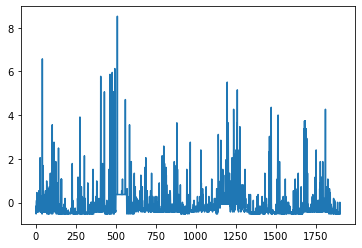

In [24]:
plt.plot(x_pts,TestY)

##### Inverse transform

In [25]:
TestY_final = scaler_2.inverse_transform(TestY.reshape(-1,1))
TEST_preds_final = scaler_2.inverse_transform(TEST_preds.reshape(-1,1))
TestY_final = TestY_final.reshape(-1)
TEST_preds_final = TEST_preds_final.reshape(-1)

for i in range(TEST_preds_final.shape[0]):
    if TEST_preds_final[i] < 0:
        TEST_preds_final[i] = 0   

##### Plot of predicted values and true values (after scaling back)

<function matplotlib.pyplot.legend(*args, **kwargs)>

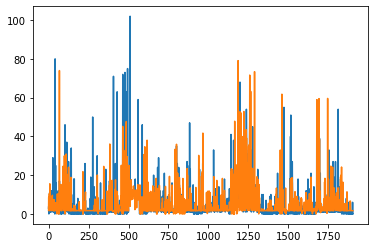

In [26]:
plt.plot(x_pts,TestY_final,TEST_preds_final)
plt.legend

##### Plot to show the margin of error between predicted values and true values in regression model

Text(0.5, 1.0, 'Error within and outside tolerance value of 10')

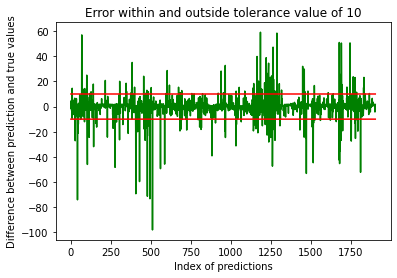

In [27]:
constant_10 = np.full(TestX.shape[0] ,10)
constant_neg_10 = np.full(TestX.shape[0] ,-10)
plt.plot(x_pts,TEST_preds_final-TestY_final,color='green')
plt.plot(x_pts,constant_10,color="red")
plt.plot(x_pts,constant_neg_10,color='red')
plt.xlabel("Index of predictions")
plt.ylabel("Difference between prediction and true values")
plt.title("Error within and outside tolerance value of 10")

In [28]:
TestY_final = TestY_final.reshape(-1)
TEST_preds_final = TEST_preds_final.reshape(-1)
print("The shape of the test predictions",TEST_preds_final.shape)
print("The shape of the True values of test",TestY_final.shape)
print("The shape of the ML-model prediction values of Y",Test_old_pred.shape) 

The shape of the test predictions (1904,)
The shape of the True values of test (1904,)
The shape of the ML-model prediction values of Y (1904,)


##### Calculation of accuracy in binary classification by MLP model

In [29]:
DL_binary_right_predition = 0
DL_binary_wrong_predition = 0
dl_threshold = 9
for i in range(TEST_preds_final.shape[0]):
    if ((TEST_preds_final[i] >= dl_threshold and TestY_final[i] >= 10) or (TEST_preds_final[i] < dl_threshold and TestY_final[i] < 10)):
        DL_binary_right_predition+=1
    else:
        DL_binary_wrong_predition+=1

In [30]:
print("Prediction ", "True") 
for i in range(TEST_preds_final.shape[0]):
    if not ((TEST_preds_final[i] >= dl_threshold and TestY_final[i] >= 10) or (TEST_preds_final[i] < dl_threshold and TestY_final[i] < 10)):
        if (TEST_preds_final[i]-TestY_final[i] > 10):
            print(TEST_preds_final[i],"  ",TestY_final[i]) 

Prediction  True
15.539403    1.0
14.96157    1.0
15.333482    1.0
14.1201105    3.0
29.96925    5.0
13.763466    2.0
18.862581    1.0
21.782907    1.0
20.083223    0.0
24.526121    6.0
16.995363    5.0
18.041365    6.0
11.790833    1.0
14.812769    1.0
36.072598    1.0
17.399635    2.0
25.105143    1.0
11.637729    1.0
12.975626    0.0
12.873446    1.0
11.431133    1.0
14.676323    1.0
34.639584    6.0
18.373236    3.0
13.107496    2.0
14.736325    2.0
19.379238    9.0
11.11155    1.0
13.193765    3.0
13.654612    3.0
30.208345    2.0
12.062451    1.0
21.94527    5.0
41.702103    9.0
19.230652    7.0
17.289186    2.0
18.317638    6.0
15.892796    1.0
23.322887    5.0
47.822636    8.0
16.244265    5.0
25.309492    5.0
19.277527    5.0
21.501213    5.0
19.226185    5.0
18.659473    5.0
21.432343    3.0
21.868176    5.0
27.321438    1.0
30.934013    2.0
43.488693    9.0
18.061405    1.0
12.981959    2.0
26.402527    3.0
26.175869    7.0
18.069223    7.0
23.688696    2.0
19.153944    1.0


##### *Calculation of balanced accuracy score by MLP model and random forest model

In [31]:
TestY_final.shape
#TEST_preds_final.shape
sample_weights = np.ones(TestY_final.shape[0])

In [32]:
for i in range(TestY_final.shape[0]):
    val = TestY_final[i] 
    if 10 < val < 25:
        sample_weights[i] = 5
    elif 25 < val < 50:
        sample_weights[i] = 8
    elif 50 < val < 100:
        sample_weights[i] = 10
    elif val > 100:
        sample_weights[i] = 30

In [33]:
from sklearn.metrics import balanced_accuracy_score

In [34]:
TestY_final_bin = np.ones(TestY_final.shape[0])
TestY_pred_bin = np.ones(TestY_final.shape[0])
ML_pred = np.ones(TestY_final.shape[0])

In [35]:
for i in range(TestY_final.shape[0]):
    if TestY_final[i]<10:
        TestY_final_bin[i]=0
    if TEST_preds_final[i]<10:
        TestY_pred_bin[i]=0
    if Test_old_pred[i]<0.5:
        ML_pred[i] = 0

### The balanced accuracy score for our MLP model

In [36]:
balanced_accuracy_score(TestY_final_bin, TestY_pred_bin,sample_weight=sample_weights)

0.6933715629085236

### The balanced accuracy score for the random forest model

In [37]:
balanced_accuracy_score(TestY_final_bin, ML_pred,sample_weight=sample_weights)

0.7260730097002054

### The generic accuracy score of MLP model

In [38]:
dl_acc = DL_binary_right_predition/TestY_final.shape[0] * 100
print("Deep learning accuracy is:", dl_acc)

Deep learning accuracy is: 84.45378151260505


In [39]:
ML_binary_right_predition = 0
ML_binary_wrong_predition = 0
ml_threshold = 0.5
for i in range(TEST_preds_final.shape[0]):
    if ((Test_old_pred[i] >= ml_threshold and TestY_final[i] > 10) or (Test_old_pred[i] < ml_threshold and TestY_final[i] < 10)):
        ML_binary_right_predition+=1
    else:
        ML_binary_wrong_predition+=1

### The generic accuracy score of random forest model

In [40]:
ml_acc = ML_binary_right_predition/TestY_final.shape[0] * 100
print("Machine learning accuracy is:",ml_acc)

Machine learning accuracy is: 87.44747899159664


In [41]:
DL_true_positive = 0
DL_true_negative = 0
DL_false_positive = 0
DL_false_negative = 0
dl_threshold = 10


for i in range(TEST_preds_final.shape[0]):
    
    if (TEST_preds_final[i] >= dl_threshold and TestY_final[i] >= 10): 
        DL_true_positive+=1
    
    elif (TEST_preds_final[i] < dl_threshold and TestY_final[i] < 10):
        DL_true_negative+=1
        
    elif (TEST_preds_final[i] >= dl_threshold and TestY_final[i] < 10):
        DL_false_positive+=1
        
    else:
        DL_false_negative+=1
        
DL_true_positive = DL_true_positive/TestY_final.shape[0] * 100
DL_true_negative = DL_true_negative/TestY_final.shape[0] * 100
DL_false_positive = DL_false_positive/TestY_final.shape[0] * 100
DL_false_negative = DL_false_negative/TestY_final.shape[0] * 100
DL_false_positive

6.880252100840337

##### Calculation of confusion matrix parameters of MLP and Random forest model

In [42]:
ML_true_positive = 0
ML_true_negative = 0
ML_false_positive = 0
ML_false_negative = 0
ml_threshold = 0.5

for i in range(TEST_preds_final.shape[0]):
    
    if (Test_old_pred[i] >= ml_threshold and TestY_final[i] >= 10): 
        ML_true_positive+=1
    
    elif (Test_old_pred[i] < ml_threshold and TestY_final[i] < 10):
        ML_true_negative+=1
        
    elif (Test_old_pred[i] >= ml_threshold and TestY_final[i] < 10):
        ML_false_positive+=1

    else:
        ML_false_negative+=1
        
ML_true_positive = ML_true_positive/TestY_final.shape[0] * 100
ML_true_negative = ML_true_negative/TestY_final.shape[0] * 100
ML_false_positive = ML_false_positive/TestY_final.shape[0] * 100
ML_false_negative = ML_false_negative/TestY_final.shape[0] * 100
ML_false_positive

2.100840336134454

In [43]:
ML_false_negative

10.241596638655462

### Confusion matrix plot of MLP and random-forest models

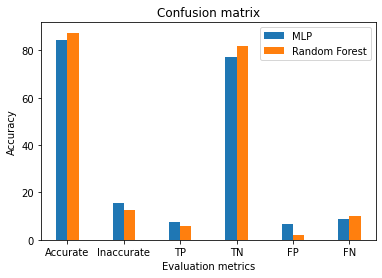

In [44]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Accurate', 'Inaccurate' , 'TP','TN','FP','FN']
dl = [dl_acc, (100 - dl_acc), DL_true_positive,DL_true_negative,DL_false_positive,DL_false_negative]
ml = [ml_acc, (100 - ml_acc), ML_true_positive,ML_true_negative,ML_false_positive,ML_false_negative]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.1, dl, 0.2, label = 'MLP')
plt.bar(X_axis + 0.1, ml, 0.2, label = 'Random Forest')
  
plt.xticks(X_axis, X)
plt.xlabel("Evaluation metrics")
plt.ylabel("Accuracy")
plt.title("Confusion matrix")
plt.legend()
plt.show()

### Generic accuracy score in the event of a multi-class classification for the MLP model

In [45]:
DL_0_to_10 = 0
DL_10_to_25 = 0
DL_25_to_50 = 0
DL_50_to_100 = 0
DL_above_100 = 0

for i in range(TEST_preds_final.shape[0]):
    
    
    if (0  <= TEST_preds_final[i] <= 10 and 0 <= TestY_final[i] <= 10):
        DL_0_to_10+=1
    
    elif (10 < TEST_preds_final[i] <= 25 and 10 < TestY_final[i] <= 25): 
        DL_10_to_25+=1
    
    elif (25 < TEST_preds_final[i] <= 50 and 25 < TestY_final[i] <= 50):
        DL_25_to_50+=1
        
    elif(50 < TEST_preds_final[i] <= 100 and 50 < TestY_final[i] <= 100):
        DL_50_to_100+=1
        
    elif((100 < TEST_preds_final[i] and 100 < TestY_final[i])):
        DL_above_100+=1

In [46]:
(DL_0_to_10 + DL_10_to_25 + DL_25_to_50 + DL_50_to_100 + DL_above_100) / TEST_preds_final.shape[0] * 100

82.77310924369748